In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
def target_distribution(theta):
    # The mixture of Gaussian distributions
    return 0.25 * np.exp(-0.5 * theta**2) / np.sqrt(2 * np.pi) + 0.75 * np.exp(-0.5 * (theta - 6)**2) / np.sqrt(2 * np.pi)

In [3]:
def metropolis_hastings_uniform_proposal(iterations, alpha, initial_value=0.0):
    samples = np.zeros(iterations)
    theta_current = initial_value

    for i in range(iterations):
        # Propose a new sample using uniform distribution
        epsilon = np.random.uniform(-alpha, alpha)
        theta_proposed = theta_current + epsilon

        # Compute acceptance probability
        alpha_mh = min(1, target_distribution(theta_proposed) / target_distribution(theta_current))

        # Accept or reject
        u = np.random.uniform(0, 1)
        if u < alpha_mh:
            theta_current = theta_proposed

        samples[i] = theta_current

    return samples

def plot_results_for_alpha(alpha_values):
    plt.figure(figsize=(15, len(alpha_values) * 5))

    for index, alpha_val in enumerate(alpha_values):
        # Generate samples
        samples = metropolis_hastings_uniform_proposal(iterations_total, alpha_val)
        samples_used = samples[1000:]

        # Time series plot
        plt.subplot(len(alpha_values), 3, index*3 + 1)
        plt.plot(samples_used)
        plt.title(f'Trace for $\\alpha$ = {alpha_val}')

        # Histogram
        plt.subplot(len(alpha_values), 3, index*3 + 2)
        plt.hist(samples_used, bins=50, density=True, alpha=0.6, label=f'MH Samples ($\\alpha$ = {alpha_val})')
        x = np.linspace(-5, 12, 400)
        y = target_distribution(x)
        plt.plot(x, y, label='Target Distribution', color='red')
        plt.legend()
        plt.title(f'Distribution for $\\alpha$ = {alpha_val}')

        # ACF plot
        plt.subplot(len(alpha_values), 3, index*3 + 3)
        plot_acf(samples_used, ax=plt.gca(), title=f'ACF for $\\alpha$ = {alpha_val}')

    plt.tight_layout()
    plt.show()

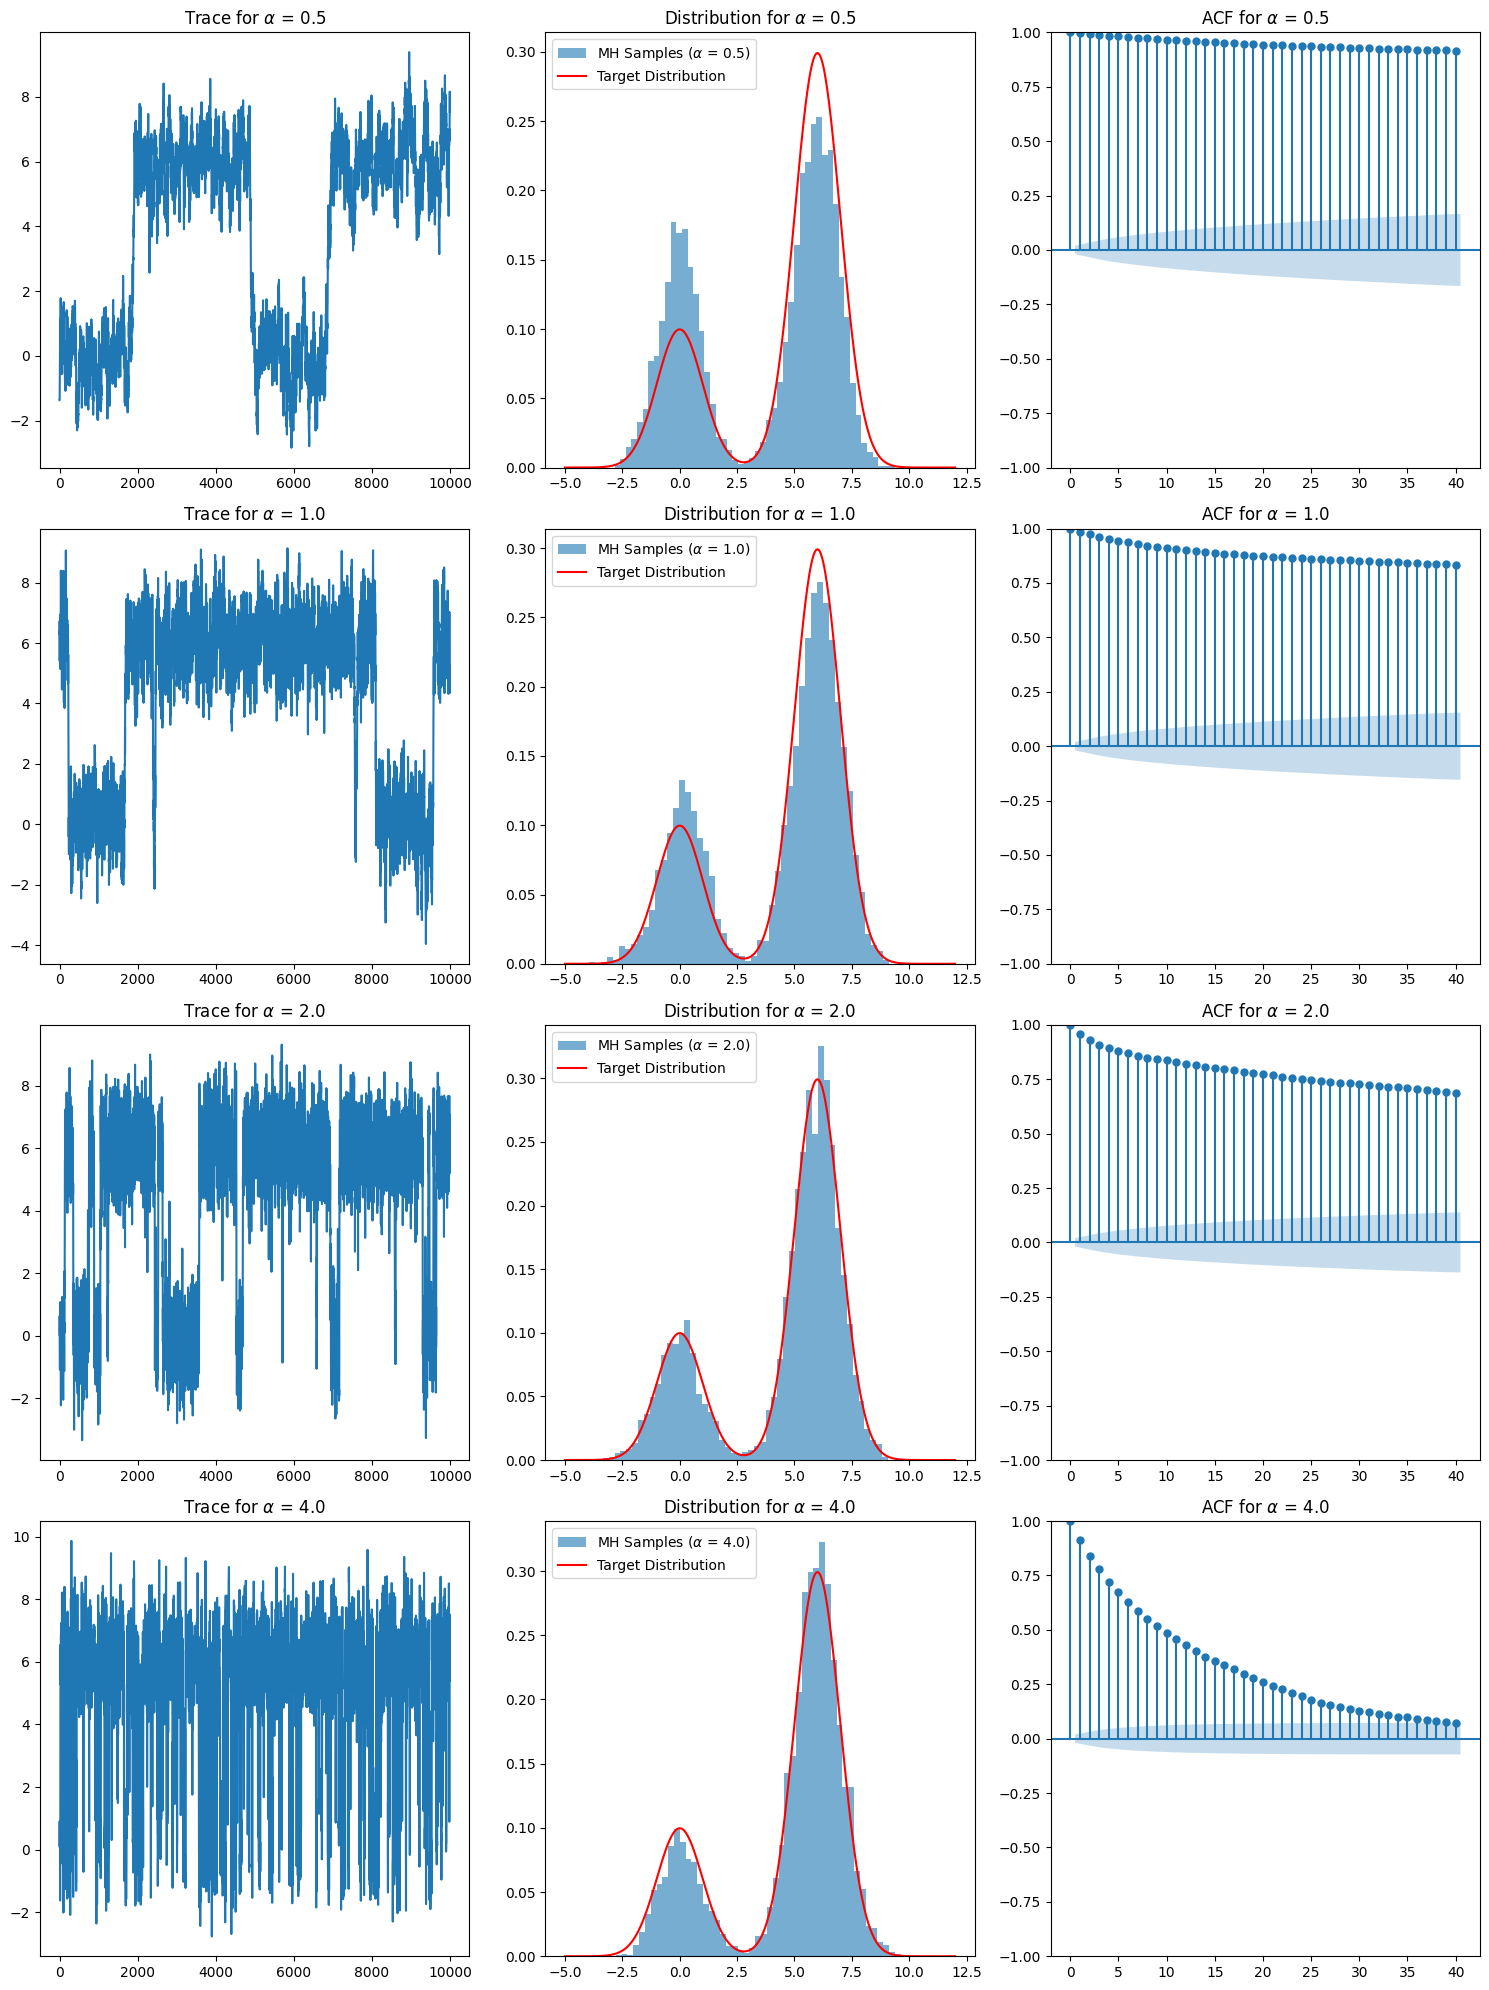

In [4]:
# Using the function to plot results
alpha_values_to_plot = [0.5, 1.0, 2.0, 4.0]
iterations_total = 11000

plot_results_for_alpha(alpha_values_to_plot)